In [1]:
! python -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [81]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
medium_data = pd.read_csv("C:\\git\\dados\\medium_data.csv")


,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30
...,...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05


In [5]:
medium_data.shape

(6508, 10)

In [12]:
medium_data["title"]

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [10]:
medium_data["title"] = medium_data["title"].str.replace(u'\xa0', u' ')

In [11]:
medium_data["title"] = medium_data["title"].str.replace('\u200a', ' ')

In [14]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(medium_data['title'])

In [34]:
tokenizer.word_index["to"]

2

In [17]:
total_words = len(tokenizer.word_index) + 1

In [36]:
linha = medium_data["title"][0]
token_list = tokenizer.texts_to_sequences([linha])[0]
token_list

[5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]

In [40]:
input_sequence = []
for line in medium_data["title"]:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequence.append(n_gram_sequence)

In [41]:
input_sequence

[[5, 676],
 [5, 676, 68],
 [5, 676, 68, 2],
 [5, 676, 68, 2, 452],
 [5, 676, 68, 2, 452, 1518],
 [5, 676, 68, 2, 452, 1518, 14],
 [5, 676, 68, 2, 452, 1518, 14, 2455],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99],
 [1858, 23],
 [1858, 23, 741],
 [1858, 23, 741, 81],
 [1858, 23, 741, 81, 103],
 [1858, 23, 741, 81, 103, 14],
 [1858, 23, 741, 81, 103, 14, 345],
 [1858, 23, 741, 81, 103, 14, 345, 345],
 [1858, 23, 741, 81, 103, 14, 345, 345, 1859],
 [7, 2],
 [7, 2, 67],
 [7, 2, 67, 3654],
 [7, 2, 67, 3654, 9],
 [7, 2, 67, 3654, 9, 40],
 [3655, 7],
 [3655, 7, 2],
 [3655, 7, 2, 266],
 [3655, 7, 2, 266, 1283],
 [3655, 7, 2, 266, 1283, 9],
 [3655, 7, 2, 266, 1283, 9, 2456],
 [3655, 7, 2, 266, 1283, 9, 2456, 23],
 [3655, 7, 2, 266, 1283, 9, 2456, 23, 10],
 [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938],
 [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938, 222],
 [5, 192],
 [5, 192, 64],
 [5, 192, 64, 192],
 [5, 192, 64, 192, 485],
 [5, 192, 64, 192, 485,

In [44]:
maximo = 0
for x in input_sequence:
    if len(x) > maximo:
        maximo = len(x)
maximo

40

In [52]:
input_sequences = pad_sequences(input_sequence, maxlen=maximo, padding='pre')

In [53]:
input_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
       676])

In [55]:
entrada = input_sequences[0, :-1]
label = input_sequences[0, -1]
print(entrada)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5]
676


In [57]:
xs = input_sequences[:, :-1]
labels = input_sequences[:,-1]

In [61]:
xs

array([[  0,   0,   0, ...,   0,   0,   5],
       [  0,   0,   0, ...,   0,   5, 676],
       [  0,   0,   0, ...,   5, 676,  68],
       ...,
       [  0,   0,   0, ...,  65,   5,  85],
       [  0,   0,   0, ...,   5,  85,  56],
       [  0,   0,   0, ...,  85,  56, 730]])

In [72]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [73]:
model = Sequential()

In [74]:
model.add(Embedding(total_words, 100, input_length=maximo-1))

In [75]:
model.add(Bidirectional(LSTM(150)))

In [76]:
model.add(Dense(total_words, activation='softmax'))

In [77]:
adam = Adam(learning_rate=0.01)

In [78]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [101]:
EPOCAS = 20

In [102]:
history = model.fit(xs, ys, epochs=EPOCAS, verbose=1)

Epoch 1/20
1515/1515 [==============================] - 338s 223ms/step - loss: 5.7763 - accuracy: 0.1755
Epoch 2/20
1515/1515 [==============================] - 181s 119ms/step - loss: 4.9670 - accuracy: 0.2063
Epoch 3/20
1515/1515 [==============================] - 137s 91ms/step - loss: 4.2464 - accuracy: 0.2496
Epoch 4/20
1515/1515 [==============================] - 131s 86ms/step - loss: 3.7190 - accuracy: 0.2980
Epoch 5/20
1515/1515 [==============================] - 130s 86ms/step - loss: 3.3533 - accuracy: 0.3361
Epoch 6/20
1515/1515 [==============================] - 287s 190ms/step - loss: 3.1180 - accuracy: 0.3650
Epoch 7/20
1515/1515 [==============================] - 356s 235ms/step - loss: 2.9606 - accuracy: 0.3825
Epoch 8/20
1515/1515 [==============================] - 127s 84ms/step - loss: 2.8130 - accuracy: 0.4035
Epoch 9/20
1515/1515 [==============================] - 125s 83ms/step - loss: 2.7150 - accuracy: 0.4164
Epoch 10/20
1515/1515 [============================

In [103]:
model

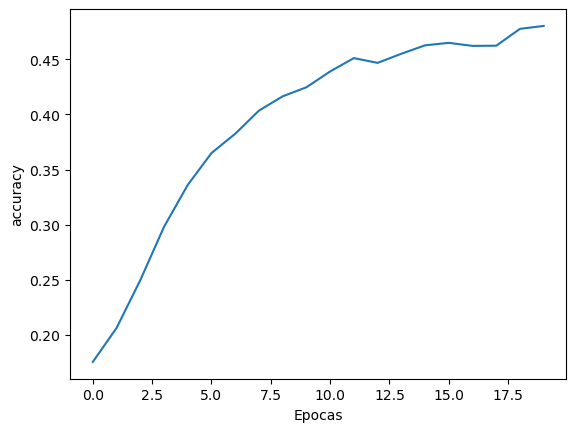

In [104]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epocas")
plt.ylabel('accuracy')
plt.show()

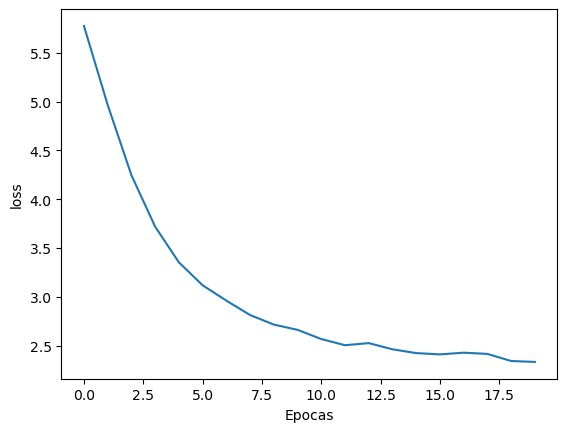

In [105]:
plt.plot(history.history['loss'])
plt.xlabel("Epocas")
plt.ylabel('loss')
plt.show()

In [135]:
seed_text = "usa predict"
next_words = 2
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=maximo-1, padding='pre')
    
    predicted = model.predict(token_list, verbose=0)
    # predicted_int = (predicted > 0.5).astype("int32")
    predicted_int = np.argmax(predicted, axis=-1)
    # print(predicted_int)
    # print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        # print(word, index, predicted_int[0], index == predicted_int)
        
        # print(predicted_int)
        # print(palavra_prevista)
        if index == predicted_int:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

usa predict employee retention
